In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler,RobustScaler
import torch
import torch.nn as nn  # Base neural network module
from torch.nn import Linear, ReLU, Sigmoid, Module  # Optional specific layers

from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


In [68]:
file = r'D:\github_repo_forked\lifetime_value\titanic\train.csv'

In [69]:
titanic_data = pd.read_csv(file)

In [70]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
unique_values = {col: titanic_data[col].unique() for col in titanic_data.columns}
for col, values in unique_values.items():
    print(f"\n{col}:")
    print(values)


PassengerId:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

In [72]:
CATEGORICAL_FEATURES = [
    'Ticket',
    'Cabin',
]
BINARY_FEATURES = [
    'Sex',
]
LOW_CARD_FEATURES = [
    'Pclass', 
    'Embarked'
]
NUMERIC_FEATURES = [
    'Age',
    'SibSp',
    'Parch',
    'Fare'
]
LABEL = 'Survived'

In [73]:
titanic_data = titanic_data.fillna(0)


***
## 数据预处理--判断数据的分布，选择合适的处理方式
- 严重偏态: Log + StandardScaler
- 中等偏态: RobustScaler
- 正态分布: StandardScaler
- 均匀分布: MinMaxScaler

不同分布的histogram

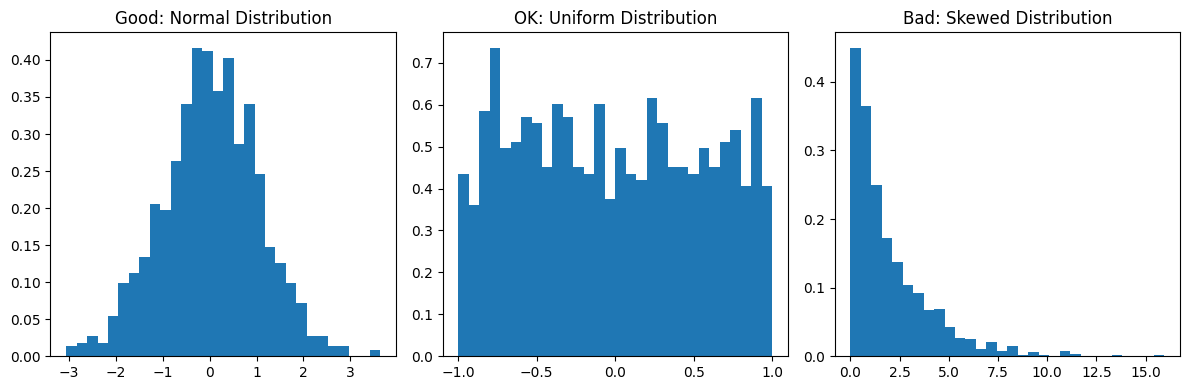

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate different distributions
n_samples = 1000
good_data = np.random.normal(0, 1, n_samples)  # 标准正态分布
skewed_data = np.random.exponential(2, n_samples)  # 偏态分布
uniform_data = np.random.uniform(-1, 1, n_samples)  # 均匀分布

# Plot distributions
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(good_data, bins=30, density=True)
plt.title('Good: Normal Distribution')

plt.subplot(132)
plt.hist(uniform_data, bins=30, density=True)
plt.title('OK: Uniform Distribution')

plt.subplot(133)
plt.hist(skewed_data, bins=30, density=True)
plt.title('Bad: Skewed Distribution')

plt.tight_layout()
plt.show()

1. Histogram
- 显示数据频率分布
- 查看是否对称、偏态
- 看是否符合正态分布
- 峰值位置和数量
2. Q-Q Plot (Quantile-Quantile Plot)
- 对角线表示完美正态分布
- 点落在对角线上 = 数据正态
- 向上弯曲 = 右偏
- 向下弯曲 = 左偏
3. Box Plot
- 中位数: 盒子中的线
- IQR(四分位距): 盒子的高度
- 异常值: 超出须线的点
- 对称性: 中位线在盒子中的位置


Age Distribution Analysis:
Shapiro-Wilk test p-value: 0.0000
Kolmogorov-Smirnov test p-value: 0.0000
Skewness: 0.2624
Kurtosis: -0.5412

SibSp Distribution Analysis:
Shapiro-Wilk test p-value: 0.0000
Kolmogorov-Smirnov test p-value: 0.0000
Skewness: 3.6891
Kurtosis: 17.7735

Parch Distribution Analysis:
Shapiro-Wilk test p-value: 0.0000
Kolmogorov-Smirnov test p-value: 0.0000
Skewness: 2.7445
Kurtosis: 9.7166

Fare Distribution Analysis:
Shapiro-Wilk test p-value: 0.0000
Kolmogorov-Smirnov test p-value: 0.0000
Skewness: 4.7793
Kurtosis: 33.2043


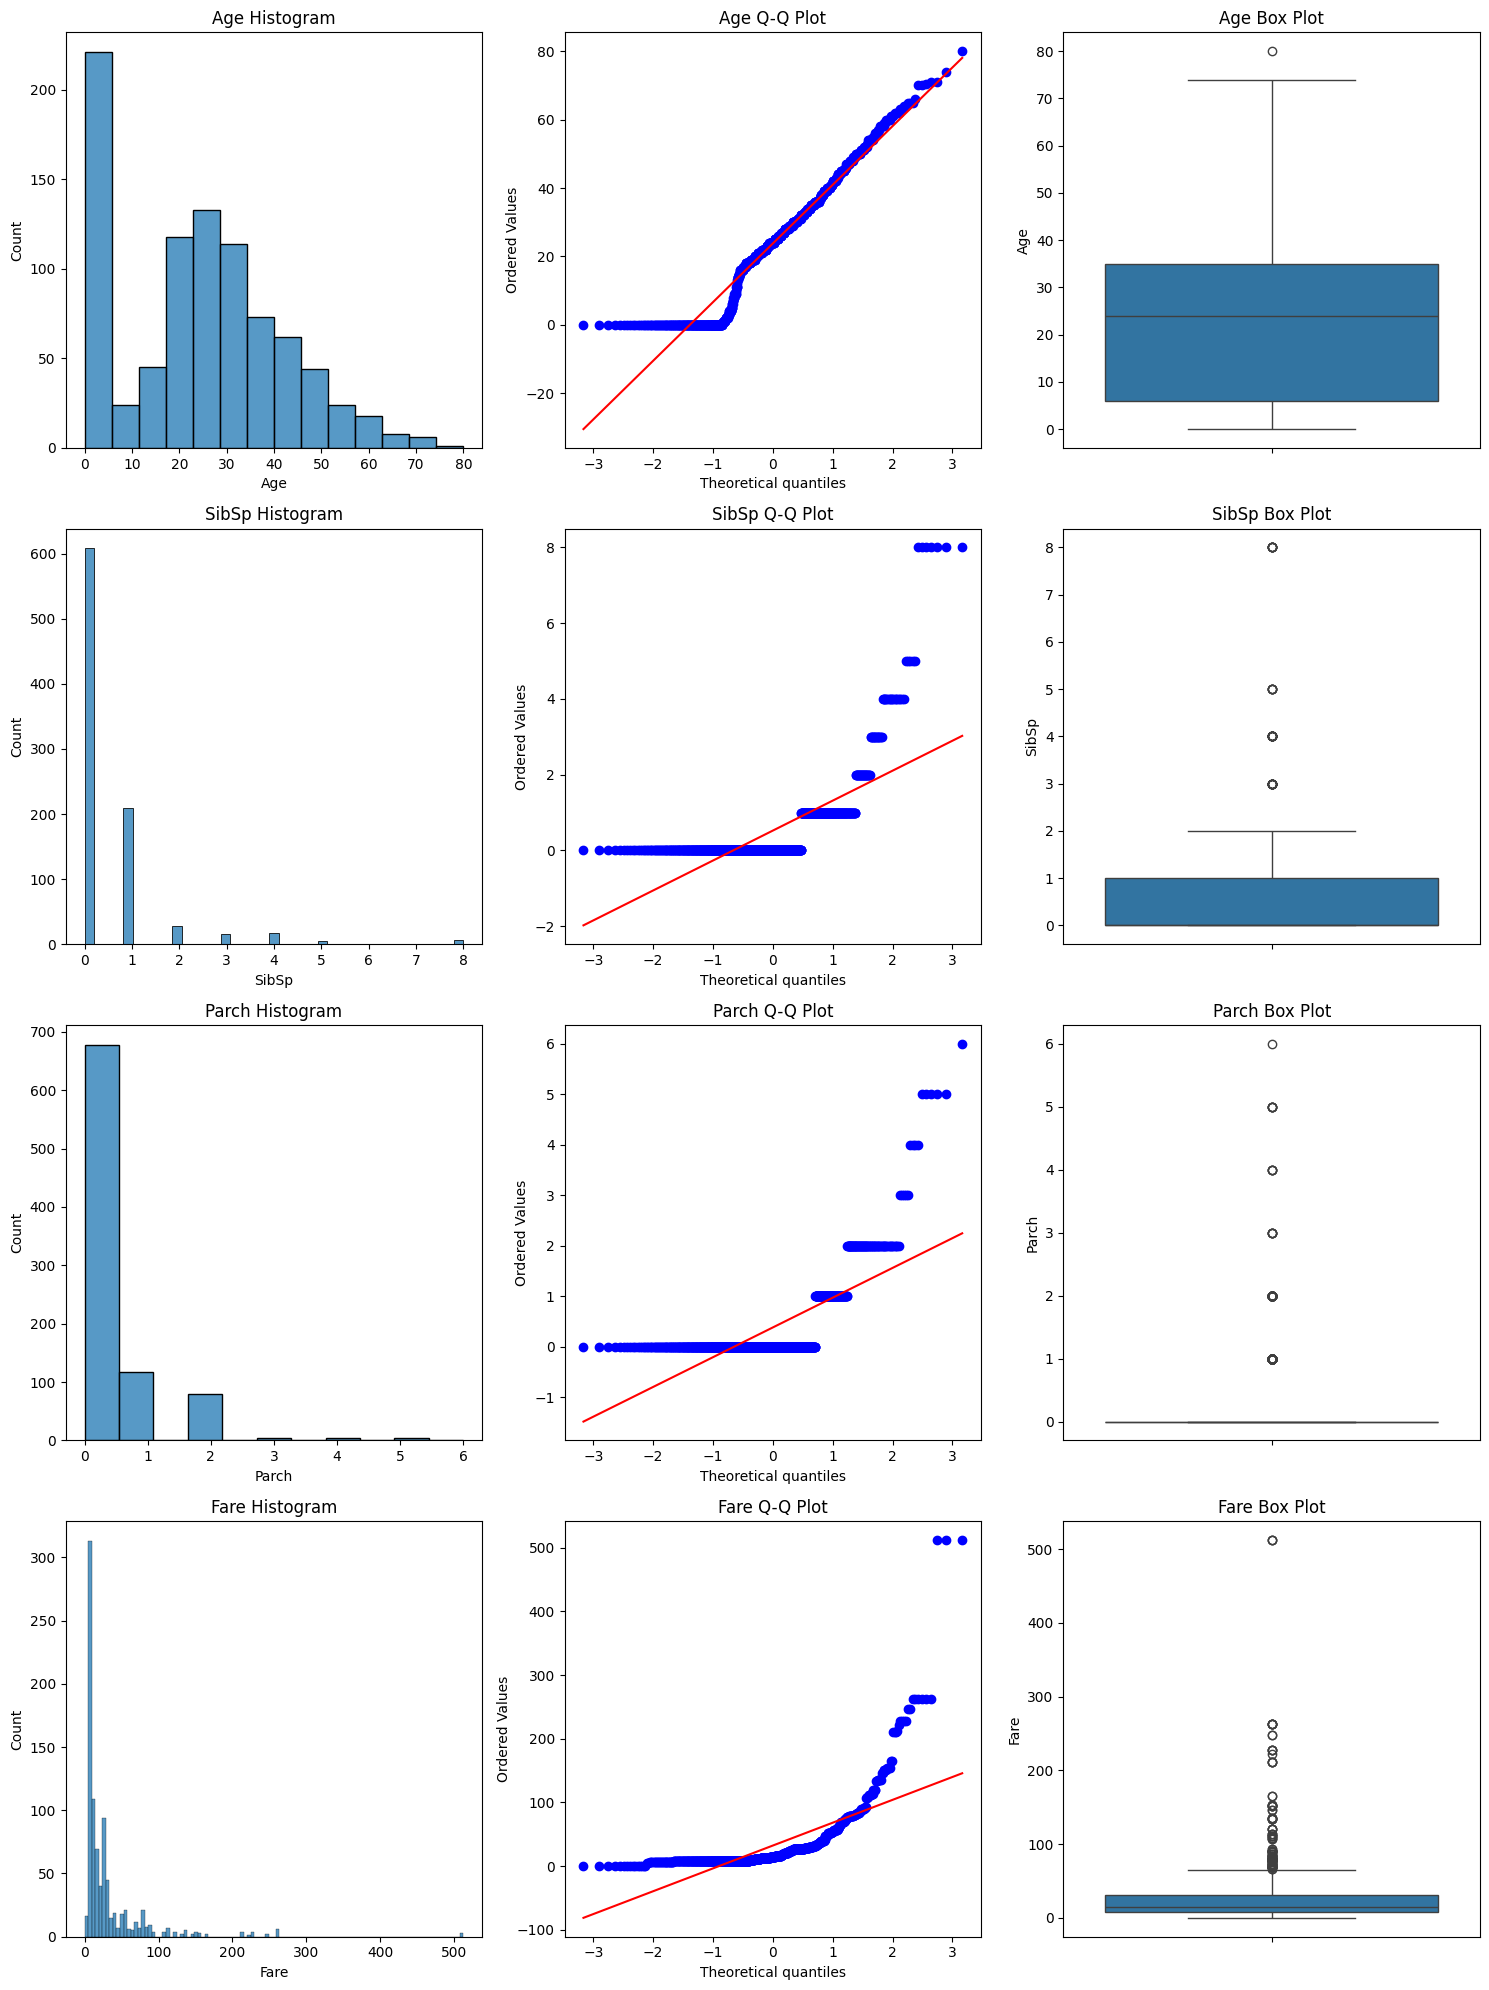

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_distribution(df, numeric_features):
    plt.figure(figsize=(15, 5*len(numeric_features)))
    
    for idx, feature in enumerate(numeric_features, 1):
        data = df[feature].dropna()
        
        # Statistical tests
        shapiro_stat, shapiro_p = stats.shapiro(data)
        ks_stat, ks_p = stats.kstest(data, 'norm')
        
        # Visualization
        plt.subplot(len(numeric_features), 3, idx*3-2)
        sns.histplot(data=df, x=feature)
        plt.title(f'{feature} Histogram')
        
        plt.subplot(len(numeric_features), 3, idx*3-1)
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f'{feature} Q-Q Plot')
        
        plt.subplot(len(numeric_features), 3, idx*3)
        sns.boxplot(data=df[feature])
        plt.title(f'{feature} Box Plot')
        
        print(f"\n{feature} Distribution Analysis:")
        print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
        print(f"Kolmogorov-Smirnov test p-value: {ks_p:.4f}")
        print(f"Skewness: {stats.skew(data):.4f}")
        print(f"Kurtosis: {stats.kurtosis(data):.4f}")
    
    plt.tight_layout()
    plt.show()

# Usage
analyze_distribution(titanic_data, NUMERIC_FEATURES)

观察经过log变化后的分布

Number of zeros in each feature:
SibSp: 608 zeros (68.24%)
Parch: 678 zeros (76.09%)
Fare: 15 zeros (1.68%)


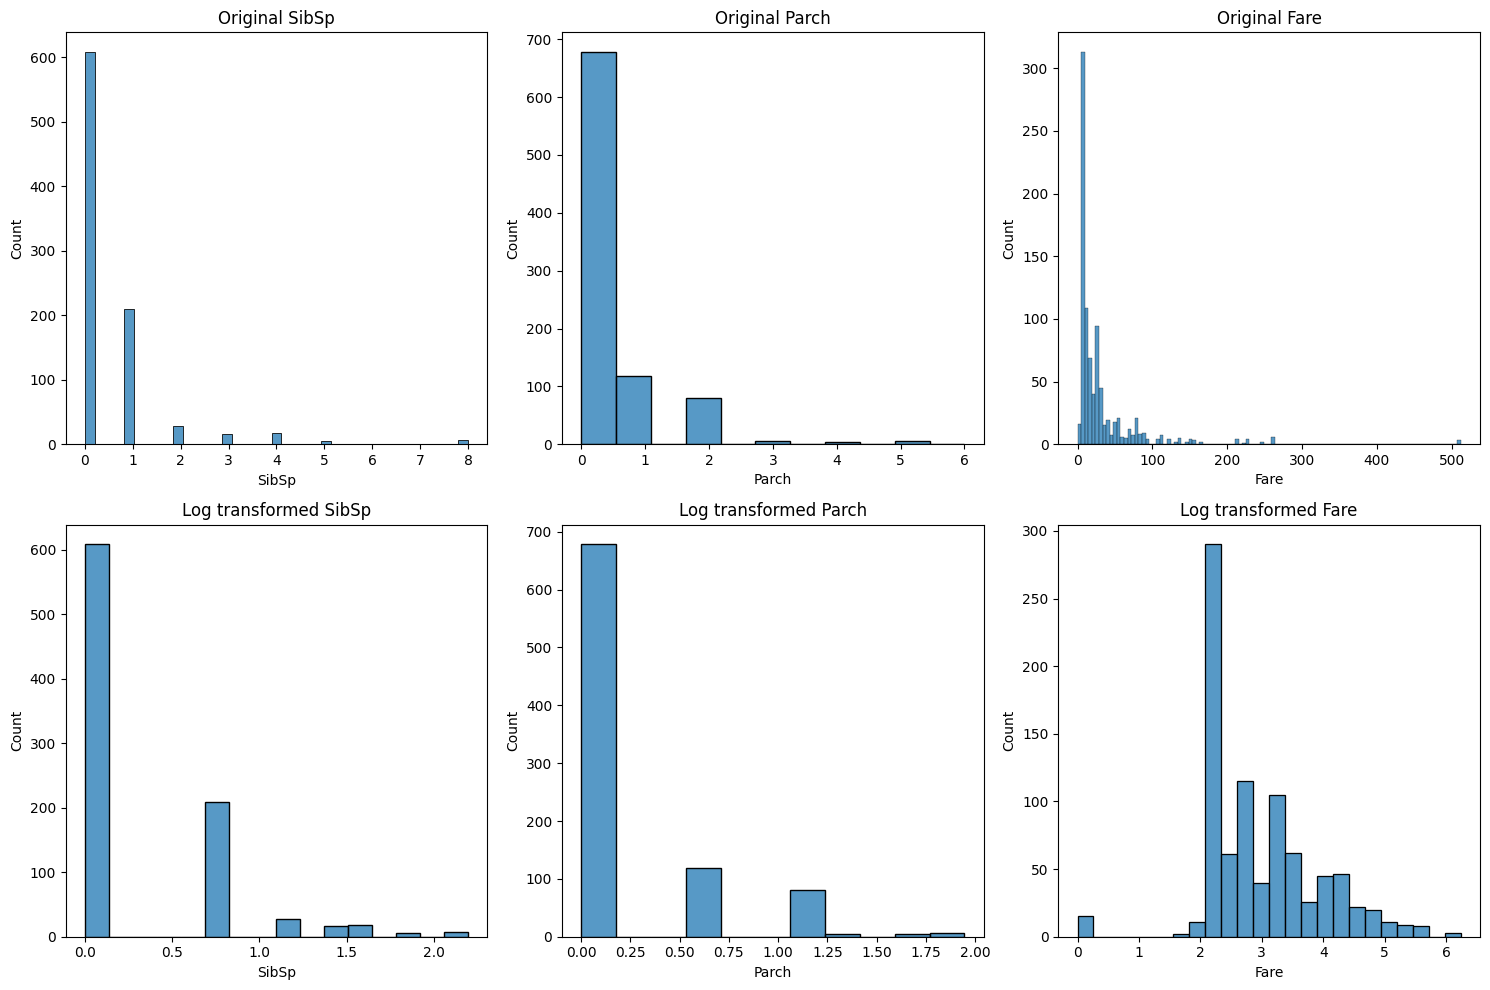


Skewness before and after log transformation:
SibSp:
  Original skewness: 3.6891
  Log-transformed skewness: 1.6584
Parch:
  Original skewness: 2.7445
  Log-transformed skewness: 1.6726
Fare:
  Original skewness: 4.7793
  Log-transformed skewness: 0.3943


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Count zeros
zero_counts = {
    'SibSp': (titanic_data['SibSp'] == 0).sum(),
    'Parch': (titanic_data['Parch'] == 0).sum(),
    'Fare': (titanic_data['Fare'] == 0).sum()
}

print("Number of zeros in each feature:")
for feat, count in zero_counts.items():
    total = len(titanic_data[feat])
    print(f"{feat}: {count} zeros ({count/total*100:.2f}%)")

# Visualize distributions and log transformations
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
features = ['SibSp', 'Parch', 'Fare']

for i, feat in enumerate(features):
    # Original distribution
    sns.histplot(data=titanic_data, x=feat, ax=axs[0,i])
    axs[0,i].set_title(f'Original {feat}')
    
    # Log transformed (adding 1 to handle zeros)
    sns.histplot(data=np.log1p(titanic_data[feat]), ax=axs[1,i])
    axs[1,i].set_title(f'Log transformed {feat}')

plt.tight_layout()
plt.show()

# Calculate skewness
print("\nSkewness before and after log transformation:")
for feat in features:
    original_skew = stats.skew(titanic_data[feat])
    log_skew = stats.skew(np.log1p(titanic_data[feat]))
    print(f"{feat}:")
    print(f"  Original skewness: {original_skew:.4f}")
    print(f"  Log-transformed skewness: {log_skew:.4f}")

检查数据类型

In [77]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [78]:
titanic_data['Cabin'].unique()

array([0, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       '

In [79]:
def preprocess_features(df):
    df_processed = df.copy()
    
    # 1. Binary encoding
    df_processed['Sex'] = (df_processed['Sex'] == 'male').astype(int)
    
    # 2. One-hot encoding for low cardinality
    low_card_features = ['Pclass', 'Embarked']
    df_processed = pd.get_dummies(df_processed, 
                                columns=low_card_features, 
                                drop_first=True)
    
    # 3. Label encoding for high cardinality (for embedding)
    high_card_features = ['Ticket', 'Cabin']
    for feat in high_card_features:
        le = LabelEncoder()
        df_processed[feat] = df_processed[feat].astype(str)
        df_processed[feat] = le.fit_transform(df_processed[feat].fillna('0'))
    
    # 4. Normalize numeric features
    age_scaler = StandardScaler()
    df_processed['Age'] = age_scaler.fit_transform(df_processed['Age'].values.reshape(-1, 1))
    
    for feat in ['SibSp', 'Parch','Fare']:
        feature_scaler = StandardScaler()
        log_transformed = np.log1p(df_processed[feat].values)
        df_processed[feat] = feature_scaler.fit_transform(log_transformed.reshape(-1, 1))
    
    return df_processed

In [80]:
preprocess_features(titanic_data).head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,-0.102313,0.889164,-0.52906,523,-0.879741,0,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.807492,0.889164,-0.52906,596,1.361220,82,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",0,0.125138,-0.609279,-0.52906,669,-0.798540,0,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.636903,0.889164,-0.52906,49,1.062038,56,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",1,0.636903,-0.609279,-0.52906,472,-0.784179,0,False,True,False,False,True


In [81]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


对比处理后的数据发现，经过label后的数据【ticket，cabin】由string变成了数字，经过one-hot的数据【pclass，embarked】分别变成了2，3列，二元数据sex变成了0，1，数值型被归一化到[-1,1]之间

In [82]:
def split_data(df, test_size=0.2, random_state=42):
    from sklearn.model_selection import train_test_split

    train_df, test_df = train_test_split(preprocess_features(df), test_size=test_size, random_state=random_state,stratify=df[LABEL])
    return train_df, test_df

***
## 模型

#### 输入分为四种类别：
1. 经过label后的数据
2. 二元分类数据
3. 经过one-hot encoding后的数据
4. 数值型数据
#### 模型
1. 输入维度的计算
2. forward的方式对应了输入数据的格式

In [91]:
def embedding_dim(x):
    return int(x**0.25) + 1

class TitanicDNN(nn.Module):
    def __init__(self, categorical_dims):
        super().__init__()
        
        # Embeddings for high cardinality
        self.embeddings = nn.ModuleDict({
            'Ticket': nn.Embedding(categorical_dims['Ticket'], embedding_dim(categorical_dims['Ticket'])),
            'Cabin': nn.Embedding(categorical_dims['Cabin'], embedding_dim(categorical_dims['Cabin']))
        })
        
        # Calculate input dimensions
        self.embedding_dim = embedding_dim(categorical_dims['Ticket']) + embedding_dim(categorical_dims['Cabin'])
        self.binary_dim = 1      # Sex
        self.onehot_dim = 5      # Pclass(2) + Embarked(3)
        self.numeric_dim = 4     # Age, SibSp, Parch, Fare
        
        total_dim = self.embedding_dim + self.binary_dim + self.onehot_dim + self.numeric_dim
        
        self.fc_layers = nn.Sequential(
            nn.Linear(total_dim, 64),
            nn.ReLU(),
            # nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            # nn.Dropout(0.2),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        # Extracting features
        ticket_embedding = self.embeddings['Ticket'](x[:, 0].long())
        cabin_embedding = self.embeddings['Cabin'](x[:, 1].long())
        binary_feature = x[:, 2:3]
        onehot_feature = x[:, 3:8]
        numeric_feature = x[:, 8:]
        # Concatenating all features
        x = torch.cat([ticket_embedding, cabin_embedding, binary_feature, onehot_feature, numeric_feature], dim=1)

        return self.fc_layers(x)

def vocab_size(df, cols):
    return {col: len(df[col].unique()) for col in cols}



*** 
## 训练

In [96]:
class TitanicDataset(Dataset):
    def __init__(self, data, labels):
        """
        初始化数据集
        :param data: 包含特征的数据 DataFrame
        :param labels: 对应的标签
        """
        self.data = data
        self.labels = labels

    def __len__(self):
        """
        返回数据集的样本数量
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        根据索引返回对应的样本和标签
        :param idx: 样本索引
        :return: 样本和标签
        """
        # 提取特征
        ticket = torch.tensor(self.data['Ticket'].iloc[idx], dtype=torch.long)
        cabin = torch.tensor(self.data['Cabin'].iloc[idx], dtype=torch.long)
        binary_feature = torch.tensor(self.data['Sex'].iloc[idx], dtype=torch.float32).unsqueeze(0)
        onehot_features = torch.tensor(self.data[['Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].iloc[idx].values, dtype=torch.float32)
        numeric_features = torch.tensor(self.data[['Age', 'SibSp', 'Parch', 'Fare']].iloc[idx].values, dtype=torch.float32)

        # 拼接特征
        features = torch.cat([ticket.unsqueeze(0), cabin.unsqueeze(0), binary_feature, onehot_features, numeric_features])

        # 获取标签
        if self.labels is not None:
            label = torch.tensor(self.labels.iloc[idx], dtype=torch.float32)
            return features, label
        return features

titanic_dataset = TitanicDataset(preprocess_features(titanic_data), titanic_data[LABEL])
sample_features, sample_label = titanic_dataset[1]
print("样本特征:", sample_features)
print("样本标签:", sample_label)

样本特征: tensor([ 5.9600e+02,  8.2000e+01,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.0000e+00,  0.0000e+00,  0.0000e+00,  8.0749e-01,  8.8916e-01,
        -5.2906e-01,  1.3612e+00])
样本标签: tensor(1.)


Epoch 1/400, Train Loss: 0.7000, Val Loss: 0.6673
Epoch 2/400, Train Loss: 0.6555, Val Loss: 0.6520
Epoch 3/400, Train Loss: 0.6302, Val Loss: 0.6488
Epoch 4/400, Train Loss: 0.6144, Val Loss: 0.6464
Epoch 5/400, Train Loss: 0.5989, Val Loss: 0.6371
Epoch 6/400, Train Loss: 0.5792, Val Loss: 0.6249
Epoch 7/400, Train Loss: 0.5593, Val Loss: 0.6164
Epoch 8/400, Train Loss: 0.5424, Val Loss: 0.6112
Epoch 9/400, Train Loss: 0.5268, Val Loss: 0.6059
Epoch 10/400, Train Loss: 0.5091, Val Loss: 0.6006
Epoch 11/400, Train Loss: 0.4888, Val Loss: 0.5945
Epoch 12/400, Train Loss: 0.4681, Val Loss: 0.5855
Epoch 13/400, Train Loss: 0.4468, Val Loss: 0.5729
Epoch 14/400, Train Loss: 0.4256, Val Loss: 0.5623
Epoch 15/400, Train Loss: 0.4079, Val Loss: 0.5587
Epoch 16/400, Train Loss: 0.3936, Val Loss: 0.5596
Epoch 17/400, Train Loss: 0.3783, Val Loss: 0.5627
Epoch 18/400, Train Loss: 0.3618, Val Loss: 0.5657
Epoch 19/400, Train Loss: 0.3431, Val Loss: 0.5713
Epoch 20/400, Train Loss: 0.3248, Val Lo

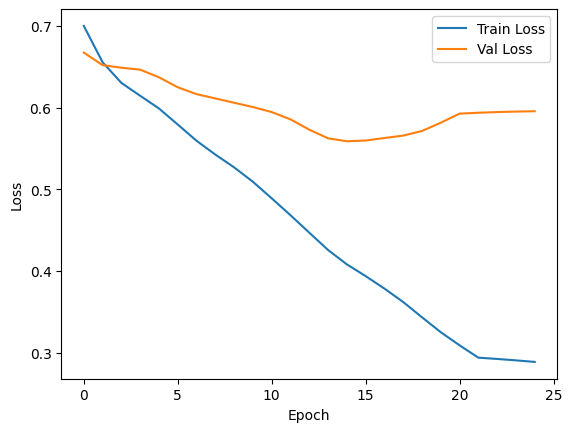

In [93]:
model = TitanicDNN(vocab_size(titanic_data, CATEGORICAL_FEATURES))
train_df, eval_df = split_data(titanic_data)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_dataset =  TitanicDataset(train_df, train_df[LABEL])
eval_dataset = TitanicDataset(eval_df, eval_df[LABEL])
    
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=1024, shuffle=False)

# Initialize variables
best_val_loss = float('inf')
patience = 10
no_improvement_count = 0
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, min_lr=1e-6)

# Training loop
train_losses = []
val_losses = []
for epoch in range(400):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in eval_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))   
            val_loss += loss.item() * inputs.size(0)
    val_loss /= len(eval_loader.dataset)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{400}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    lr_scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Plot loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

*** 
## Eval

由于使用了BCEWithLogitsLoss损失函数，因此预测概率时，需要在推理时手动添加sigmoid

### metrics含义
- Accuracy：整体的准确率  预测对的正负样本总和 除以 总样本数
- Precision：预测正类有多准  预测为正的样本中，预测正确的比例  预测对的正样本 除以 预测为正的样本数
- Recall：正样本中，预测正确的比例  预测对的正样本 除以 正样本数
- F1-score：综合Precision和Recall的指标，F1-score越高，模型的性能越好。
- roc_auc：roc曲线下的面积，roc曲线越接近左上角，模型的性能越好。数值 0.5表示随机猜测，数值 1.0表示完美预测。

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

def analyze_confusion_matrix(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                display_labels=['Class 0', 'Class 1'])
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()
    print("Confusion Matrix Analysis:")
    print(f"True Negatives (TN): {tn}")  # 正确预测为负类
    print(f"False Positives (FP): {fp}") # 错误预测为正类
    print(f"False Negatives (FN): {fn}") # 错误预测为负类
    print(f"True Positives (TP): {tp}")  # 正确预测为正类
    print("\nKey Metrics:")
    print(f"Accuracy: {accuracy:.4f}")   # 整体准确率
    print(f"Precision: {precision:.4f}") # 正类预测准确率
    print(f"Recall: {recall:.4f}")      # 正类预测召回率
    print(f"F1-score: {f1:.4f}")        # precision和recall的调和平均

def plot_roc_auc(y_true, y_pred_proba):
    # Get predicted probabilities for positive class
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc

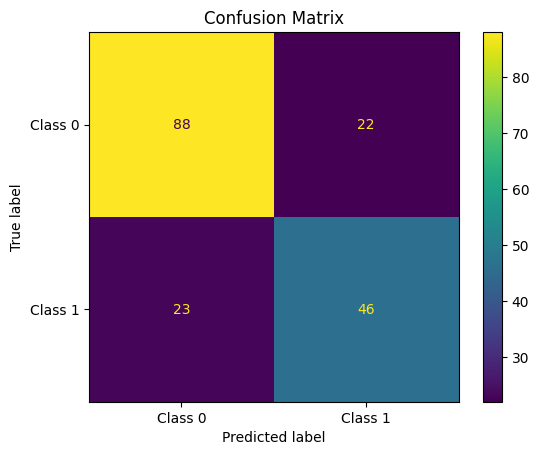

Confusion Matrix Analysis:
True Negatives (TN): 88
False Positives (FP): 22
False Negatives (FN): 23
True Positives (TP): 46

Key Metrics:
Accuracy: 0.7486
Precision: 0.6765
Recall: 0.6667
F1-score: 0.6715


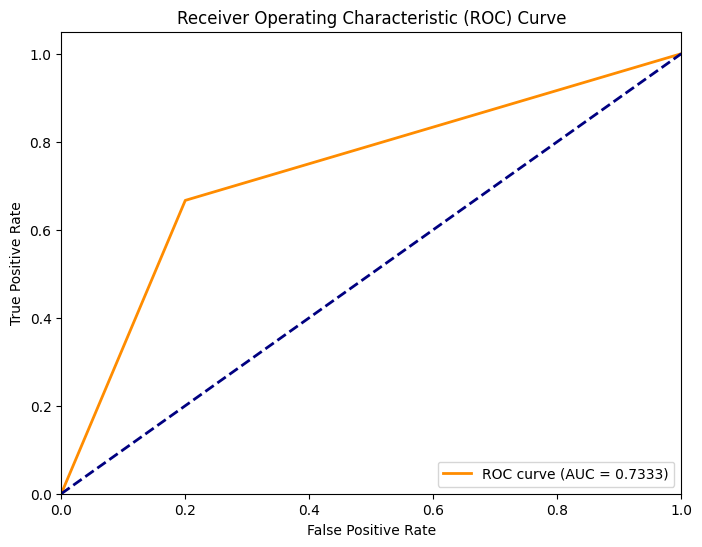

In [94]:

def evaluate_model(model, eval_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in eval_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            val_loss += loss.item() * inputs.size(0)
            
            # Get predictions
            preds = (torch.sigmoid(outputs) >= 0.5).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    val_loss /= len(eval_loader.dataset)
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    return all_preds

# Usage
y_pred = evaluate_model(model, eval_loader, criterion, device)
analyze_confusion_matrix(eval_df[LABEL].values, y_pred)
roc_auc = plot_roc_auc(eval_df[LABEL].values, y_pred)

In [105]:
import pandas as pd
import torch
from torch.utils.data import DataLoader

# Load and preprocess test data
test_file = r'D:\github_repo_forked\lifetime_value\titanic\test.csv'
test_data = pd.read_csv(test_file)
test_df = preprocess_features(test_data)
test_df['Embarked_C'] = False
# Create test dataset and dataloader
test_dataset = TitanicDataset(test_df,None)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to predict and save results
def predict_and_save(model, test_loader, device, output_file):
    model.eval()
    predictions = []
    passenger_ids = test_data['PassengerId'].values
    
    with torch.no_grad():
        for inputs in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            probs = torch.sigmoid(outputs)
            preds = (probs >= 0.5).int().cpu().numpy().squeeze(1)
            predictions.extend(preds)
    
    # Create DataFrame with PassengerId and Survived
    results_df = pd.DataFrame({
        'PassengerId': passenger_ids,
        'Survived': predictions
    })
    
    # Save to CSV
    results_df.to_csv(output_file, index=False)

# Usage
output_file = 'test_predictions.csv'
predict_and_save(model, test_loader, device, output_file)
print(f"Predictions saved to {output_file}")

Predictions saved to test_predictions.csv


In [100]:
test_df.head()
test_df['Embarked_C'] = False
test_df.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Embarked_C
0,892,"Kelly, Mr. James",1,0.298549,-0.633681,-0.497692,152,-0.866767,76,False,True,True,False,False
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,1.181328,1.038512,-0.497692,221,-0.968773,76,False,True,False,True,False
2,894,"Myles, Mr. Thomas Francis",1,2.240662,-0.633681,-0.497692,73,-0.669205,76,True,False,True,False,False
3,895,"Wirz, Mr. Albert",1,-0.231118,-0.633681,-0.497692,147,-0.773486,76,False,True,False,True,False
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,-0.584229,1.038512,1.140590,138,-0.443987,76,False,True,False,True,False
